In [ ]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Sales.csv")
df.head()


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [16]:
# ## 3. Process
# Ubah kolom Date menjadi datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Cek missing value
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [17]:
# ## 4. Analyze & 5. Visualize
# --- Analisis 1: Revenue & Profit per Negara ---
country_summary = df.groupby("Country")[["Revenue", "Profit"]].sum().sort_values("Revenue", ascending=False)
country_summary


,Revenue,Profit
Country,,
United States,27975547,11073644
Australia,21302059,6776030
United Kingdom,10646196,4413853
Germany,8978596,3359995
France,8432872,2880282
Canada,7935738,3717296


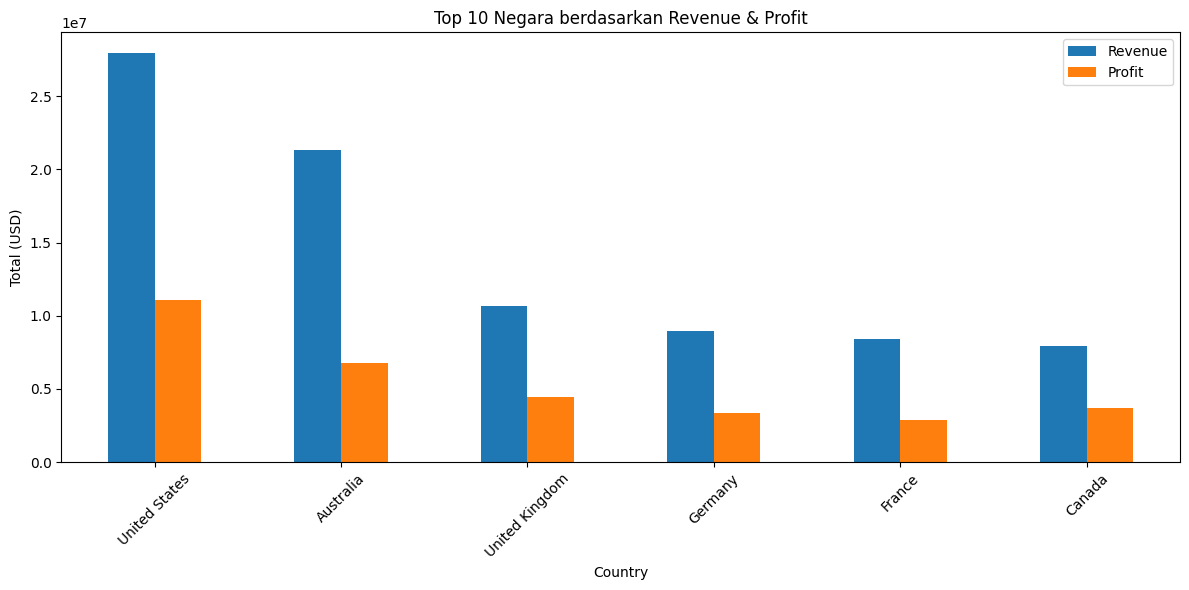

In [18]:
country_summary[["Revenue","Profit"]].plot(kind="bar", figsize=(12,6))
plt.title("Top 10 Negara berdasarkan Revenue & Profit")
plt.ylabel("Total (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# --- Analisis 2: Distribusi Revenue per Kategori Produk ---
category_summary = df.groupby("Product_Category")["Revenue"].sum().sort_values(ascending=False)
category_summary


Product_Category
Bikes          61782134
Accessories    15117992
Clothing        8370882
Name: Revenue, dtype: int64

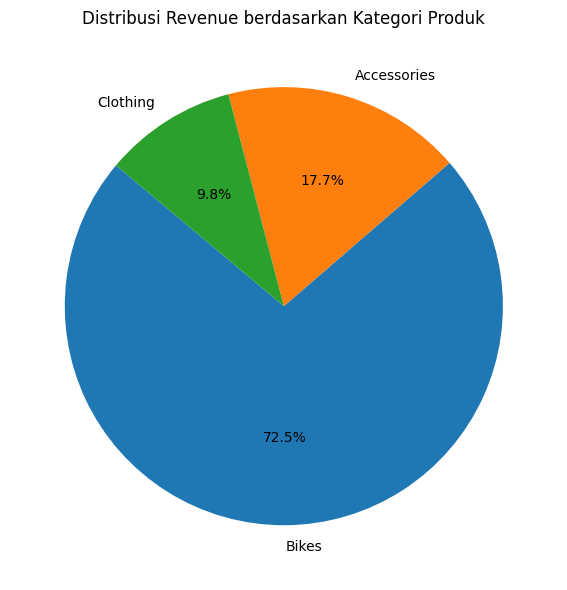

In [20]:
category_summary.plot(kind="pie", autopct='%1.1f%%', startangle=140, figsize=(8,6))
plt.title("Distribusi Revenue berdasarkan Kategori Produk")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [21]:
# --- Analisis 3: Tren Revenue Tahunan ---
yearly_summary = df.groupby("Year")["Revenue"].sum()
yearly_summary


Year
2011     8964888
2012     9175983
2013    15240037
2014    14152724
2015    20023991
2016    17713385
Name: Revenue, dtype: int64

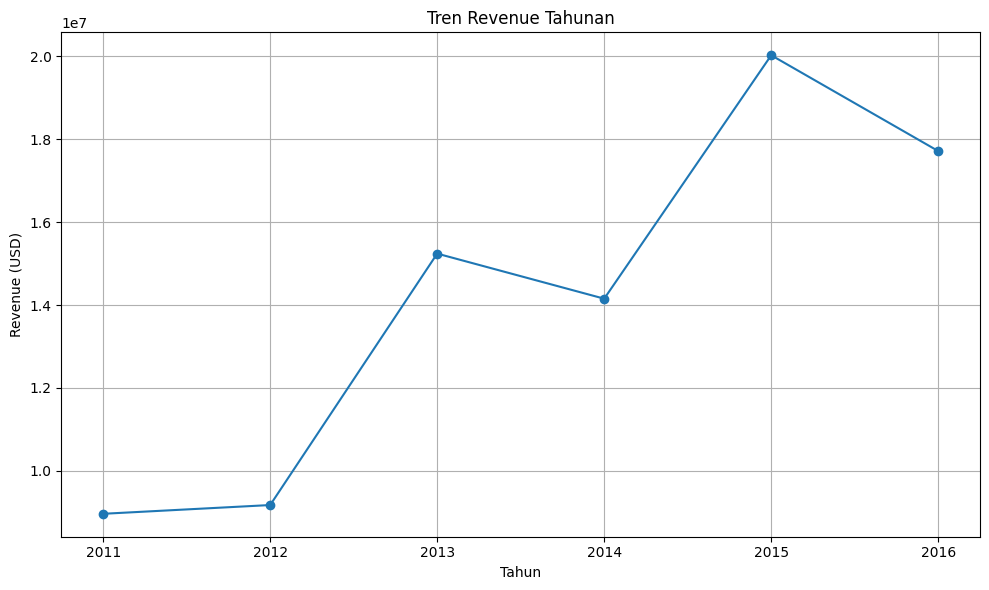

In [22]:
yearly_summary.plot(kind="line", marker='o', figsize=(10,6))
plt.title("Tren Revenue Tahunan")
plt.ylabel("Revenue (USD)")
plt.xlabel("Tahun")
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
# --- Analisis 4: Perbandingan Revenue berdasarkan Gender & Usia ---
gender_age_summary = df.groupby(["Customer_Gender","Age_Group"])["Revenue"].sum().unstack()
gender_age_summary


Age_Group,Adults (35-64),Seniors (64+),Young Adults (25-34),Youth (<25)
Customer_Gender,,,,
F,21269149,130050,15194242,5342158
M,21315004,177992,15461372,6381041


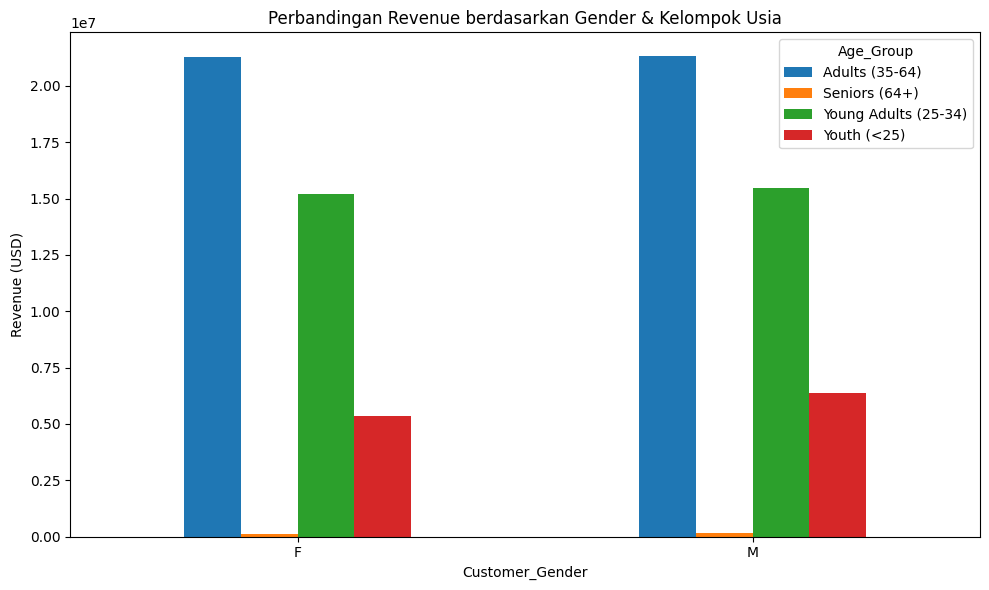

In [24]:
gender_age_summary.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Revenue berdasarkan Gender & Kelompok Usia")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


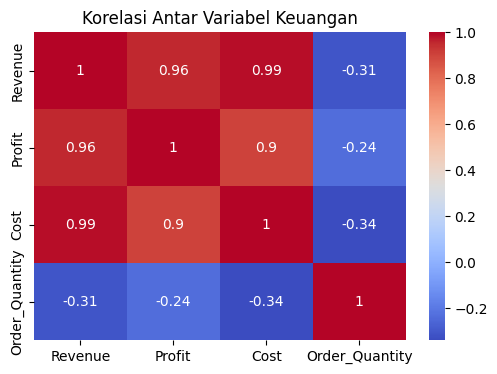

In [ ]:
#--- Analisis 5: Korelasi antar variabel keuangan ---
plt.figure(figsize=(6,4))
sns.heatmap(df[['Revenue','Profit','Cost','Order_Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Keuangan')
plt.show()


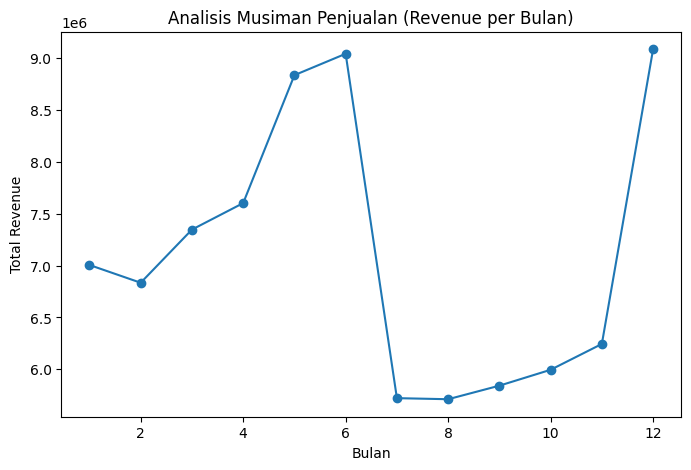

In [ ]:
#--- Analisis 6: Analisis Musiman ---
df['Month'] = df['Date'].dt.month
monthly = df.groupby('Month')['Revenue'].sum()
monthly.plot(kind='line', marker='o', figsize=(8,5))
plt.title('Analisis Musiman Penjualan (Revenue per Bulan)')
plt.xlabel('Bulan')
plt.ylabel('Total Revenue')
plt.show()

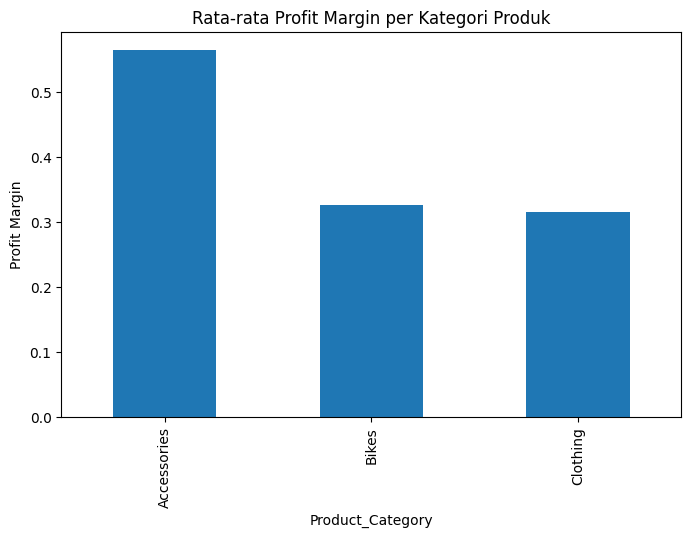

In [ ]:
#--- Analisis 7: Profit Margin per Kategori Produk ---
df['Profit_Margin'] = df['Profit'] / df['Revenue']
margin = df.groupby('Product_Category')['Profit_Margin'].mean().sort_values(ascending=False)
margin.plot(kind='bar', figsize=(8,5))
plt.title('Rata-rata Profit Margin per Kategori Produk')
plt.ylabel('Profit Margin')
plt.show()

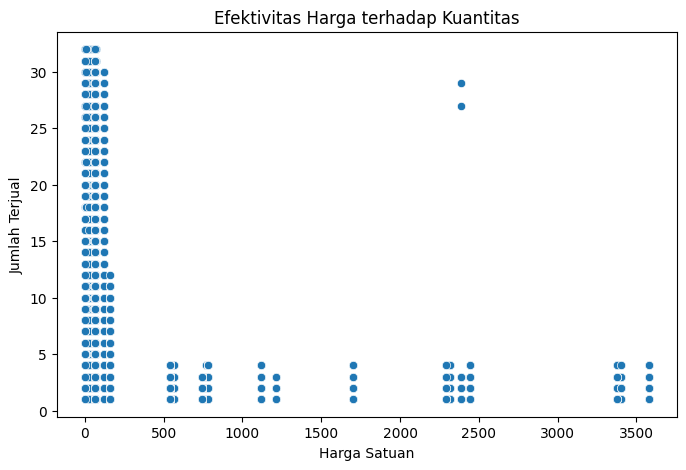

In [ ]:
#--- Analisis 8: Efektivitas Harga terhadap Kuantitas ---
plt.figure(figsize=(8,5))
sns.scatterplot(x='Unit_Price', y='Order_Quantity', data=df)
plt.title('Efektivitas Harga terhadap Kuantitas')
plt.xlabel('Harga Satuan')
plt.ylabel('Jumlah Terjual')
plt.show()